# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nar'yan-mar
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | saipan
Processing Record 4 of Set 1 | isafjordur
Processing Record 5 of Set 1 | puerto san jose
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | likiep
Processing Record 9 of Set 1 | nouadhibou
Processing Record 10 of Set 1 | san patricio
Processing Record 11 of Set 1 | ascope
Processing Record 12 of Set 1 | jayapura
Processing Record 13 of Set 1 | east london
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | katsuren-haebaru
Processing Record 17 of Set 1 | badger
Processing Record 18 of Set 1 | reyes
Processing Record 19 of Set 1 | petropavlovsk-kamchatsky
Processing Record 20 of Set 1 | lazaro cardenas
Processing Record 21 of Set 1 | qaqortoq
Processing Record 22 

Processing Record 40 of Set 4 | gudauta
Processing Record 41 of Set 4 | fiambala
Processing Record 42 of Set 4 | kodiak
Processing Record 43 of Set 4 | shubarshi
Processing Record 44 of Set 4 | laojunmiao
Processing Record 45 of Set 4 | lerwick
Processing Record 46 of Set 4 | kondratovo
Processing Record 47 of Set 4 | whitehorse
Processing Record 48 of Set 4 | el kala
Processing Record 49 of Set 4 | bardai
Processing Record 0 of Set 5 | west vancouver
Processing Record 1 of Set 5 | wailua homesteads
Processing Record 2 of Set 5 | tshikapa
Processing Record 3 of Set 5 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 4 of Set 5 | happy valley-goose bay
Processing Record 5 of Set 5 | mineral del monte
Processing Record 6 of Set 5 | mangrol
Processing Record 7 of Set 5 | kijang
Processing Record 8 of Set 5 | hermanus
Processing Record 9 of Set 5 | kone
Processing Record 10 of Set 5 | oltinko'l
Processing Record 11 of Set 5 | pisco
Processing Record 12 of Set 5 | touros
Processi

Processing Record 33 of Set 8 | namsos
Processing Record 34 of Set 8 | tamandare
Processing Record 35 of Set 8 | tucuma
Processing Record 36 of Set 8 | zhangye
Processing Record 37 of Set 8 | fale old settlement
Processing Record 38 of Set 8 | formosa do rio preto
Processing Record 39 of Set 8 | chadron
Processing Record 40 of Set 8 | kyzyl
Processing Record 41 of Set 8 | alva
Processing Record 42 of Set 8 | bousso
Processing Record 43 of Set 8 | ippy
Processing Record 44 of Set 8 | olyokminsk
Processing Record 45 of Set 8 | orchard homes
Processing Record 46 of Set 8 | queenstown
Processing Record 47 of Set 8 | kaiyuan
Processing Record 48 of Set 8 | morondava
Processing Record 49 of Set 8 | ordynskoye
Processing Record 0 of Set 9 | taboshar
Processing Record 1 of Set 9 | dzerzhinskoye
Processing Record 2 of Set 9 | maridi
Processing Record 3 of Set 9 | chonchi
Processing Record 4 of Set 9 | tolanaro
Processing Record 5 of Set 9 | san julian
Processing Record 6 of Set 9 | brockport
Pr

Processing Record 22 of Set 12 | sabha
Processing Record 23 of Set 12 | grums
Processing Record 24 of Set 12 | bogande
Processing Record 25 of Set 12 | kavaratti
Processing Record 26 of Set 12 | sake
Processing Record 27 of Set 12 | darab
-----------------------------
Data Retrieval Complete      
-----------------------------


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nar'yan-mar,67.6713,53.0870,20.57,65,100,5.16,RU,1726383754
1,thompson,55.7435,-97.8558,14.09,88,20,5.66,CA,1726383755
2,saipan,15.1355,145.7010,29.39,84,75,5.66,MP,1726383480
3,isafjordur,66.0755,-23.1240,1.99,79,6,2.73,IS,1726383757
4,puerto san jose,13.9256,-90.8244,26.61,87,100,2.31,GT,1726383758


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nar'yan-mar,67.6713,53.0870,20.57,65,100,5.16,RU,1726383754
1,thompson,55.7435,-97.8558,14.09,88,20,5.66,CA,1726383755
2,saipan,15.1355,145.7010,29.39,84,75,5.66,MP,1726383480
3,isafjordur,66.0755,-23.1240,1.99,79,6,2.73,IS,1726383757
4,puerto san jose,13.9256,-90.8244,26.61,87,100,2.31,GT,1726383758


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

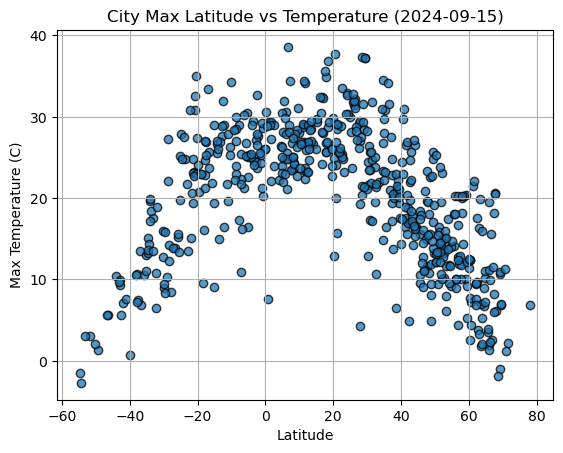

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha = 0.75, edgecolor = "black")
date_now = datetime.date(datetime.now())

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Max Latitude vs Temperature ({date_now})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

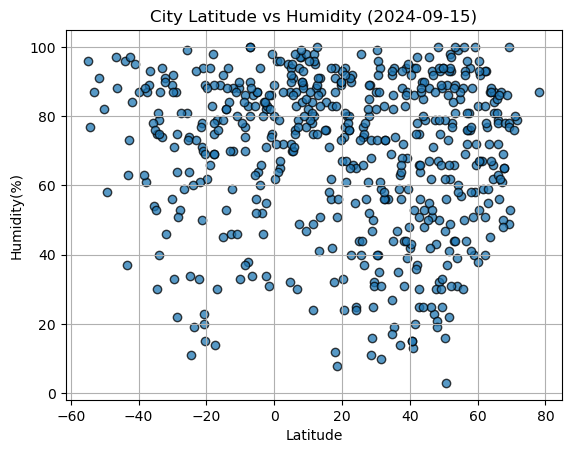

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha = 0.75, edgecolor = "black")
date_now = datetime.date(datetime.now())

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"City Latitude vs Humidity ({date_now})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

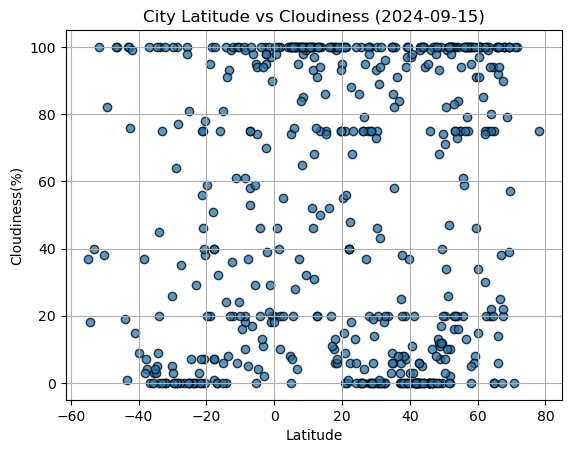

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha = 0.75, edgecolor = "black")
date_now = datetime.date(datetime.now())

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs Cloudiness ({date_now})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

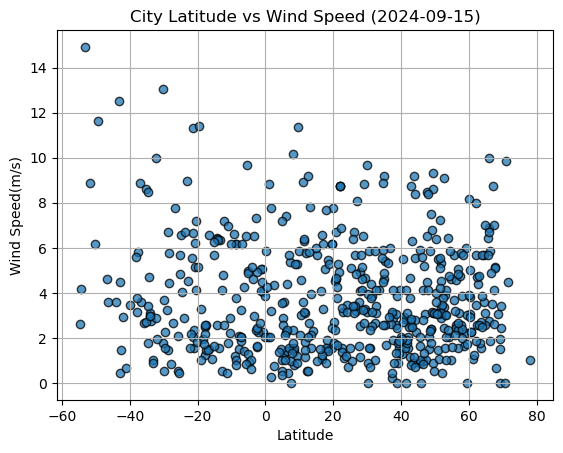

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha = 0.75, edgecolor = "black")
date_now = datetime.date(datetime.now())

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.title(f"City Latitude vs Wind Speed ({date_now})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regression_value = x_values * slope + intercept
# line_eqn = "y = " + str(slope) + "x + " + str(intercept)

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nar'yan-mar,67.6713,53.0870,20.57,65,100,5.16,RU,1726383754
1,thompson,55.7435,-97.8558,14.09,88,20,5.66,CA,1726383755
2,saipan,15.1355,145.7010,29.39,84,75,5.66,MP,1726383480
3,isafjordur,66.0755,-23.1240,1.99,79,6,2.73,IS,1726383757
4,puerto san jose,13.9256,-90.8244,26.61,87,100,2.31,GT,1726383758


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,puerto ayora,-0.7393,-90.3518,20.31,98,90,2.24,EC,1726383760
10,ascope,-7.7144,-79.1078,17.34,83,37,1.51,PE,1726383765
11,jayapura,-2.5333,140.7000,32.66,82,98,1.59,ID,1726383766
12,east london,-33.0153,27.9116,17.52,94,75,1.03,ZA,1726383767
13,edinburgh of the seven seas,-37.0676,-12.3116,13.45,89,100,8.87,SH,1726383768


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.5704581218738015


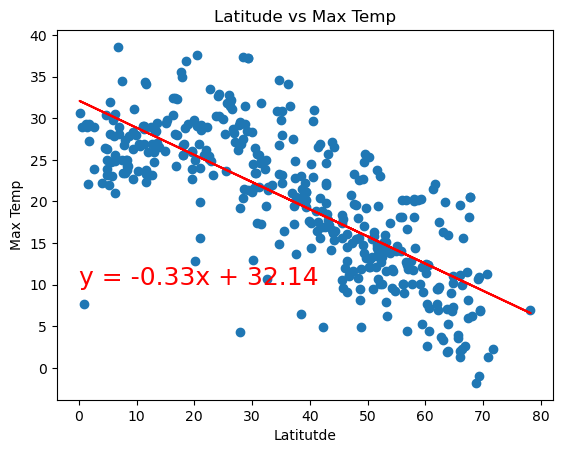

In [27]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_value = x_values * slope + intercept
line_eqn = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regression_value, "r-")
plt.scatter(x_values, y_values)
plt.annotate(line_eqn,(0,10), fontsize=18,color="red")
plt.xlabel("Latitutde")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp")
print(f"The r^2-value is: {rvalue*rvalue}")



The r^2-value is: 0.6027764293545115


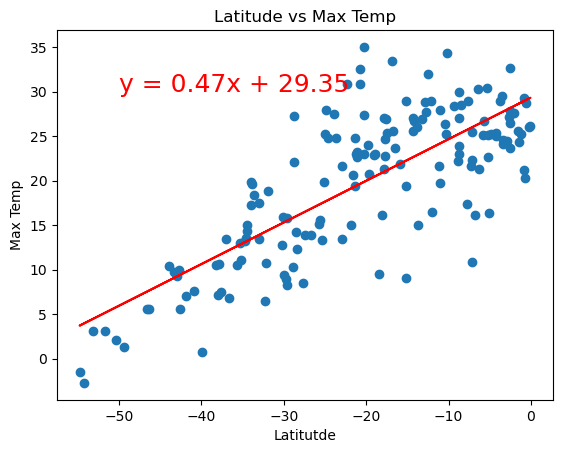

In [28]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_value = x_values * slope + intercept
line_eqn = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regression_value, "r-")
plt.scatter(x_values, y_values)
plt.annotate(line_eqn,(-50,30), fontsize=18,color="red")
plt.xlabel("Latitutde")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp")
print(f"The r^2-value is: {rvalue*rvalue}")

**Discussion about the linear relationship:**
Regression plot and analysis shows the correlation of Max T vs Latittude for southern hemishere is slighly stronger than that of northern hemisphere.

As expected in both hemispheres, the further one goes away from the equator, the temperature decreases.



### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.009502346758870735


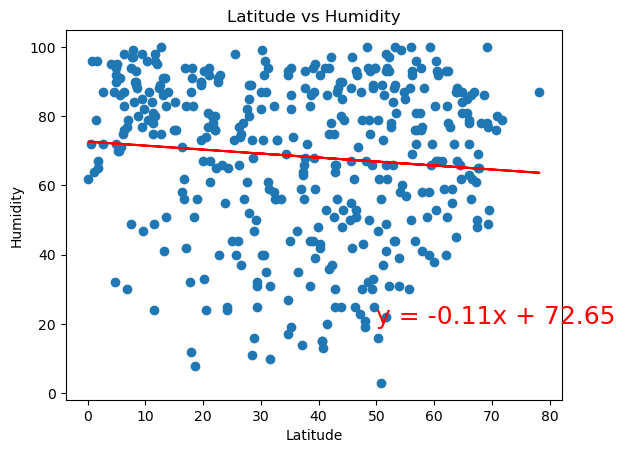

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_value = x_values * slope + intercept
line_eqn = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regression_value, "r-")
plt.scatter(x_values, y_values)
plt.annotate(line_eqn,(50,20), fontsize=18,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")
print(f"The r^2-value is: {rvalue*rvalue}")

The r^2-value is: 0.003008266418781896


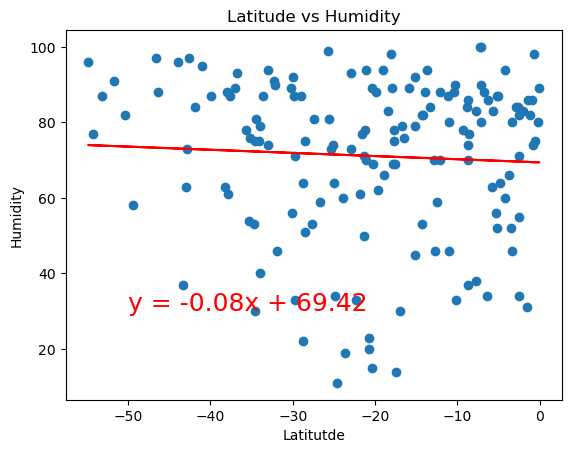

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_value = x_values * slope + intercept
line_eqn = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regression_value, "r-")
plt.scatter(x_values, y_values)
plt.annotate(line_eqn,(-50,30), fontsize=18,color="red")
plt.xlabel("Latitutde")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")
print(f"The r^2-value is: {rvalue*rvalue}")

**Discussion about the linear relationship:** 
For both hemispheres, correlation between humidity vs. latitude is very weak. In both cases, R2 value is very low.


### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.0037167599555276757


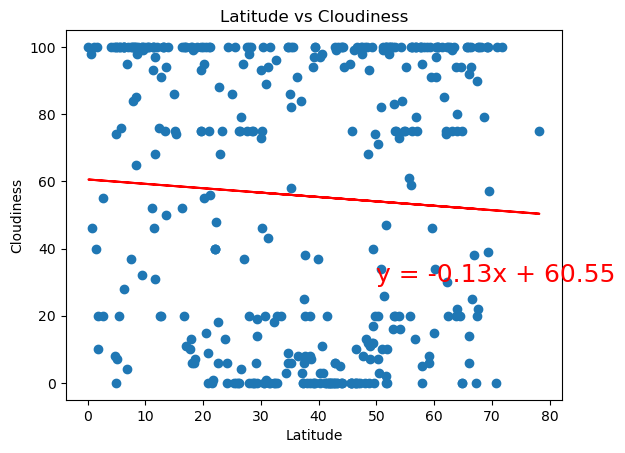

In [31]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_value = x_values * slope + intercept
line_eqn = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regression_value, "r-")
plt.scatter(x_values, y_values)
plt.annotate(line_eqn,(50,30), fontsize=18,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")
print(f"The r^2-value is: {rvalue*rvalue}")

The r^2-value is: 0.012065483770060859


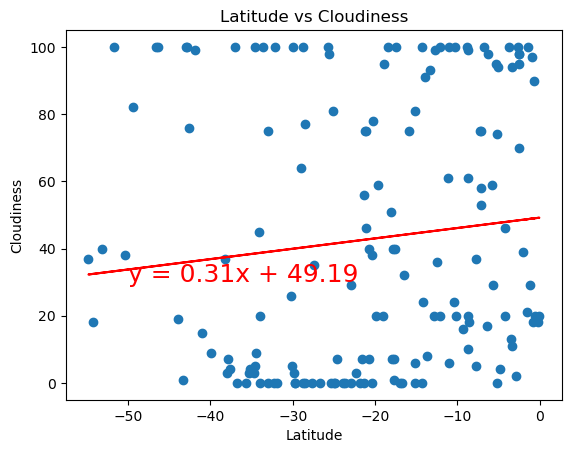

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_value = x_values * slope + intercept
line_eqn = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regression_value, "r-")
plt.scatter(x_values, y_values)
plt.annotate(line_eqn,(-50,30), fontsize=18,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")
print(f"The r^2-value is: {rvalue*rvalue}")

**Discussion about the linear relationship:** There seems to be no defintive correlation between cloudiness vs laitude for either hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0008948973458459283


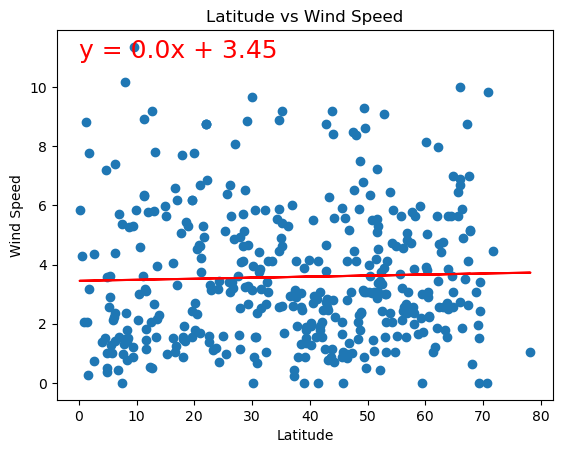

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_value = x_values * slope + intercept
line_eqn = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regression_value, "r-")
plt.scatter(x_values, y_values)
plt.annotate(line_eqn,(0,11), fontsize=18,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
print(f"The r^2-value is: {rvalue*rvalue}")

The r^2-value is: 0.038438776905514324


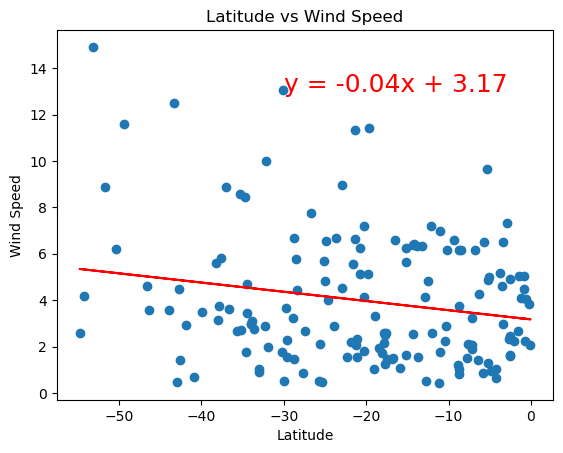

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_value = x_values * slope + intercept
line_eqn = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regression_value, "r-")
plt.scatter(x_values, y_values)
plt.annotate(line_eqn,(-30,13), fontsize=18,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
print(f"The r^2-value is: {rvalue*rvalue}")

**Discussion about the linear relationship:** There seems to be no defintive correlation between wind speed vs laitude for either hemispheres.